## 层次聚类

In [1]:
import pandas as pd

seeds_df = pd.read_csv('./datasets/seeds-less-rows.csv')
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [2]:
seeds_df.grain_variety.value_counts()  

Rosa wheat        14
Canadian wheat    14
Kama wheat        14
Name: grain_variety, dtype: int64

In [3]:
varieties = list(seeds_df.pop('grain_variety'))

samples = seeds_df.values

In [4]:
samples.dtype

dtype('float64')

In [5]:
samples

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5

In [6]:
#距离计算的 还有树状图
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [7]:
#进行层次聚类
mergings = linkage(samples, method='complete')

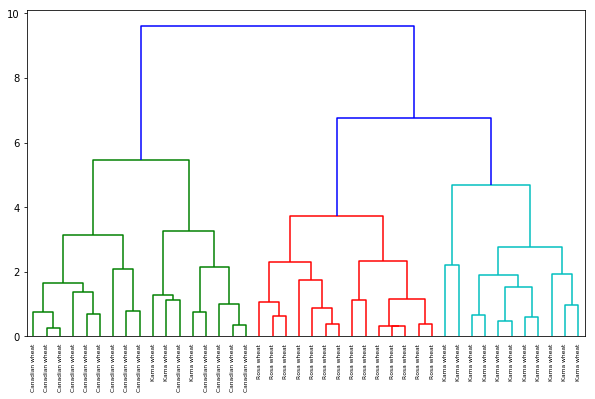

In [8]:
#树状图结果
fig = plt.figure(figsize=(10,6))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [9]:
#得到标签结果
#maximum height自己指定
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings, 4, criterion='distance')

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,9,0,0
2,5,3,0
3,0,0,14
4,0,2,0
5,0,9,0


In [10]:
df

,labels,varieties
0,5,Kama wheat
1,5,Kama wheat
2,5,Kama wheat
3,4,Kama wheat
4,5,Kama wheat
5,2,Kama wheat
6,5,Kama wheat
7,5,Kama wheat
8,2,Kama wheat
9,5,Kama wheat


In [11]:
labels

array([5, 5, 5, 4, 5, 2, 5, 5, 2, 5, 4, 5, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2],
      dtype=int32)

#### 不同距离的选择会产生不同的结果

In [12]:
import pandas as pd

scores_df = pd.read_csv('./datasets/eurovision-2016-televoting.csv', index_col=0)
country_names = list(scores_df.index)
scores_df.head()

,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,2.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,5.0,7.0,0.0,0.0,3.0,0.0,6.0,0.0
Armenia,NaN,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,7.0,...,0.0,5.0,1.0,12.0,0.0,0.0,2.0,0.0,10.0,0.0
Australia,0.0,NaN,3.0,0.0,12.0,10.0,0.0,0.0,0.0,7.0,...,1.0,6.0,0.0,5.0,0.0,2.0,0.0,0.0,8.0,4.0
Austria,0.0,3.0,NaN,0.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,12.0,8.0,4.0,0.0,7.0,6.0,10.0,0.0
Azerbaijan,0.0,2.0,0.0,NaN,0.0,8.0,0.0,0.0,0.0,4.0,...,0.0,5.0,3.0,12.0,0.0,0.0,0.0,0.0,10.0,0.0


In [13]:
#缺失值填充，没有的就先按满分算吧
scores_df = scores_df.fillna(12)

In [14]:
from sklearn.preprocessing import normalize
samples = normalize(scores_df.values)

In [15]:
samples

array([[0.09449112, 0.56694671, 0.        , ..., 0.        , 0.28347335,
        0.        ],
       [0.49319696, 0.        , 0.16439899, ..., 0.        , 0.41099747,
        0.        ],
       [0.        , 0.49319696, 0.12329924, ..., 0.        , 0.32879797,
        0.16439899],
       ...,
       [0.32879797, 0.20549873, 0.24659848, ..., 0.49319696, 0.28769823,
        0.        ],
       [0.28769823, 0.16439899, 0.        , ..., 0.        , 0.49319696,
        0.        ],
       [0.        , 0.24659848, 0.        , ..., 0.        , 0.20549873,
        0.49319696]])

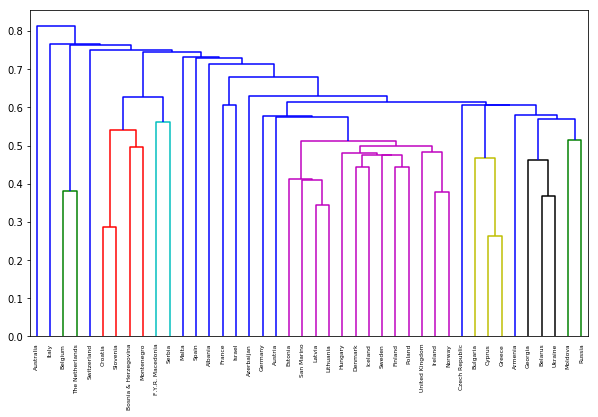

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

mergings = linkage(samples, method='single')
fig = plt.figure(figsize=(10,6))
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

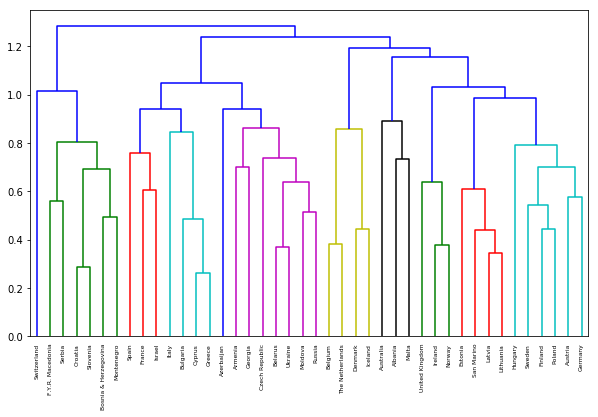

In [17]:
mergings = linkage(samples, method='complete')
fig = plt.figure(figsize=(10,6))
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()